In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['text.usetex'] = True # TeX rendering
plt.rcParams.update({
    "font.family": "serif",   # specify font family here
    "font.serif": ["Times"],  # specify font here
    "font.size":12})          # specify font size here

In [2]:
def cpfs_plot(df, time_ticks, plot_title, plot_path, logscale=False, legend=True):
    x = time_ticks
    avgPF1 = np.array(df['avg_infid_PF1'])
    stdPF1 = np.array(df['std_infid_PF1'])
    avgPF2 = np.array(df['avg_infid_PF2'])
    stdPF2 = np.array(df['std_infid_PF2'])

    avgCPF1 = np.array(df['avg_infid_CPF1'])
    stdCPF1 = np.array(df['std_infid_CPF1'])
    avgCPF2 = np.array(df['avg_infid_CPF2'])
    stdCPF2 = np.array(df['std_infid_CPF2'])

    plt.plot(x, avgPF1, label="PF1", color="darkorange", marker=".", alpha=.8)
    plt.fill_between(x, avgPF1 - stdPF1, avgPF1 + stdPF1, color="darkorange", alpha=0.1)

    plt.plot(x, avgPF2, label="PF2", color="green", marker=".", alpha=.8)
    plt.fill_between(x, avgPF2 - stdPF2, avgPF2 + stdPF2, color="green", alpha=0.1)

    plt.plot(x, avgCPF1, label="CPF1", color="blue", marker=".", alpha=.8)
    plt.fill_between(x, avgCPF1 - stdCPF1, avgCPF1 + stdCPF1, color="blue", alpha=0.1)

    plt.plot(x, avgCPF2, label="CPF2", color="red", marker=".", alpha=.8)
    plt.fill_between(x, avgCPF2 - stdCPF2, avgCPF2 + stdCPF2, color="red", alpha=0.1)

    plt.xlabel("Total simulation time $t$", fontsize=12)
    plt.ylabel("Average infidelity", fontsize=12)

    if logscale:
        plt.yscale("log")
        plt.xscale("log")
    
    if legend:
        plt.legend(markerscale=2, ncol=1, frameon=False, loc='upper left')

    plt.minorticks_on()
    plt.title(plot_title)
    plt.savefig(plot_path, dpi=300, bbox_inches='tight', transparent=False)
    plt.show()

## Plots for actual hardware implementations

In [9]:
df = pd.read_csv('../hardware experiments/ibm_implementation_ising_2sites_10steps_1e5shots_0.1pparam_20ticks.csv')
df

,description,avg_infid_PF1,std_infid_PF1,avg_infid_PF2,std_infid_PF2,avg_infid_CPF1,std_infid_CPF1,avg_infid_CPF2,std_infid_CPF2
0,nqubits=2,0.017220,0.000791,0.009197,0.000236,0.004990,0.000070,0.005222,0.000413
1,nsteps=10,0.016467,0.000482,0.009597,0.000097,0.007107,0.000391,0.007567,0.000570
2,nshots=10^5,0.016260,0.001177,0.009192,0.000129,0.005717,0.000345,0.005593,0.000158
3,pparam=0.1,0.016135,0.000617,0.009102,0.000201,0.006780,0.000320,0.006132,0.000717
4,"ticks=np.linspace(0.1,1,20)",0.016565,0.000869,0.009755,0.000203,0.006082,0.000324,0.009017,0.000486
5,0,0.016608,0.000932,0.009472,0.000137,0.009150,0.000140,0.009258,0.000259
6,0,0.016195,0.000651,0.009200,0.000292,0.009217,0.000180,0.009195,0.000236
7,0,0.016397,0.000923,0.009293,0.000311,0.009262,0.000312,0.009343,0.000395
8,0,0.016192,0.000633,0.021573,0.002109,0.009147,0.000154,0.009665,0.000329
9,0,0.015860,0.000470,0.019810,0.001923,0.008940,0.000326,0.009492,0.000215


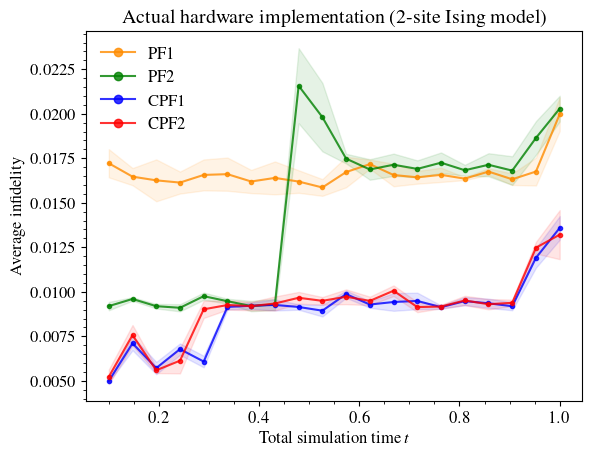

In [10]:
df_hw = pd.read_csv('../hardware experiments/ibm_implementation_ising_2sites_10steps_1e5shots_0.1pparam_20ticks.csv')
tticks = np.linspace(0.1,1,20)
plot_title = 'Actual hardware implementation (2-site Ising model)'
plot_path = '../plots/ibm_hardware_implementation.pdf'
cpfs_plot(df_hw, tticks, plot_title=plot_title, plot_path = plot_path)

In [11]:
def cpfs_plot2(df, time_ticks, plot_title, plot_path, logscale=False, legend=True):
    x = time_ticks
    avgPF1 = np.array(df['avg_infid_PF1'])
    stdPF1 = np.array(df['std_infid_PF1'])
    avgPF2 = np.array(df['avg_infid_PF2'])
    stdPF2 = np.array(df['std_infid_PF2'])

    avgCPF1 = np.array(df['avg_infid_CPF1'])
    stdCPF1 = np.array(df['std_infid_CPF1'])
    avgCPF2 = np.array(df['avg_infid_CPF2'])
    stdCPF2 = np.array(df['std_infid_CPF2'])

    plt.plot(x, avgPF1, label="PF1", color="darkorange", marker=".", alpha=.8)
    plt.fill_between(x, avgPF1 - stdPF1, avgPF1 + stdPF1, color="darkorange", alpha=0.1)

    plt.plot(x, avgPF2, label="PF2", color="green", marker=".", alpha=.8)
    plt.fill_between(x, avgPF2 - stdPF2, avgPF2 + stdPF2, color="green", alpha=0.1)

    plt.plot(x, avgCPF1, label="CPF1", color="blue", marker=".", alpha=.8)
    plt.fill_between(x, avgCPF1 - stdCPF1, avgCPF1 + stdCPF1, color="blue", alpha=0.1)

    plt.plot(x, avgCPF2, label="CPF2", color="red", marker=".", alpha=.8)
    plt.fill_between(x, avgCPF2 - stdCPF2, avgCPF2 + stdCPF2, color="red", alpha=0.1)

    plt.xlabel("Total simulation time $t$", fontsize=12)
    plt.ylabel("Error (Average infidelity)", fontsize=12)

    if logscale:
        plt.yscale("log")
        plt.xscale("log")
    
    if legend:
        plt.legend(markerscale=2, ncol=1, frameon=False, loc='upper left')

    plt.minorticks_on()
    plt.title(plot_title)
    plt.savefig(plot_path, dpi=300, bbox_inches='tight', transparent=False)
    plt.show()

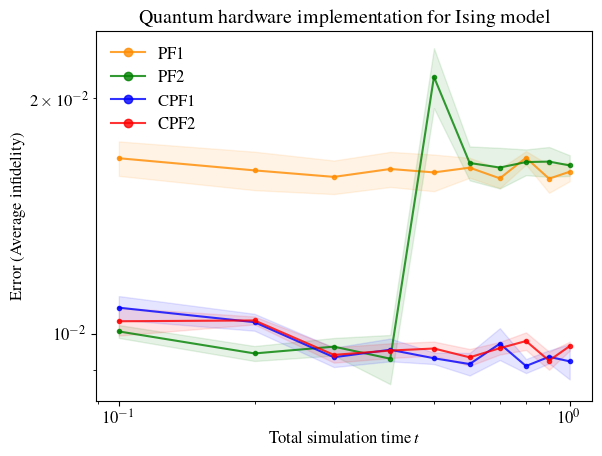

In [18]:
df_hw = pd.read_csv('../hardware experiments/ibm_implementation_ising_2sites_10steps_1e5shots_0.1pparam_10ticks.csv')
tticks = np.linspace(0.1,1,10)
plot_title = 'Quantum hardware implementation for Ising model'
plot_path = '../plots/hardware_implementation_10ticks.pdf'
cpfs_plot2(df_hw, tticks, plot_title=plot_title, plot_path = plot_path, logscale=True)

## Noisy hardware simulation

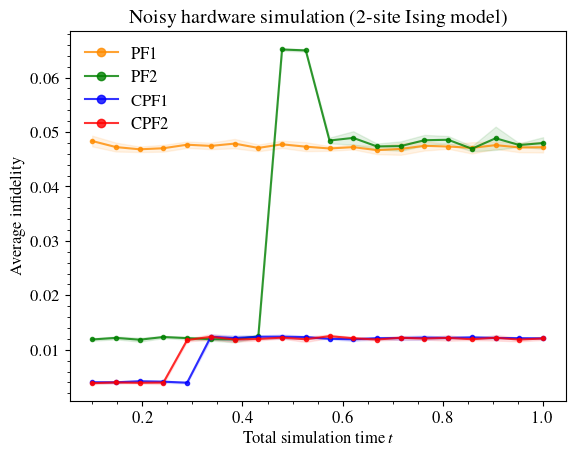

In [21]:
df_sim = pd.read_csv('../hardware experiments/ibm_noisy_simulation_ising_2sites_10steps_1e5shots_0.1pparam_20ticks.csv')
tticks = np.linspace(0.1,1,20)
plot_title = 'Noisy hardware simulation (2-site Ising model)'
plot_path = '../plots/ibm_noisy_hardware_simulation.pdf'
cpfs_plot(df_sim, tticks, plot_title=plot_title, plot_path = plot_path)


# Noiseless hardware simulation

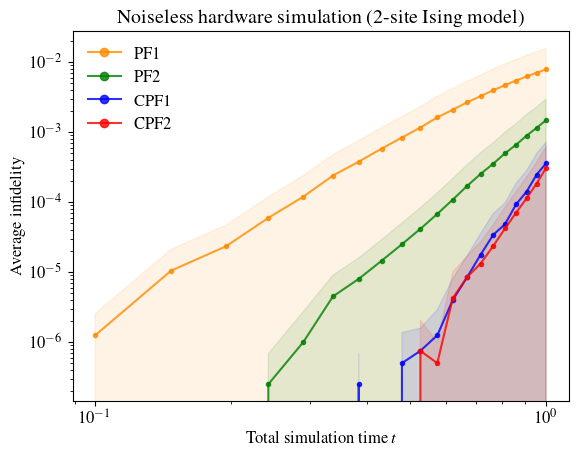

In [25]:
#2-site Ising model
df_noiseless_sim_2site = pd.read_csv('../hardware experiments/ibm_noiseless_simulation_ising_2sites_1step_1e6shots_0.1pparam_20ticks.csv')
tticks = np.linspace(0.1,1,20)
plot_title = 'Noiseless hardware simulation (2-site Ising model)'
plot_path = '../plots/ibm_noiseless_hardware_simulation_2site_Ising.pdf'
cpfs_plot(df_noiseless_sim_2site, tticks, plot_title=plot_title, plot_path = plot_path, logscale=True)

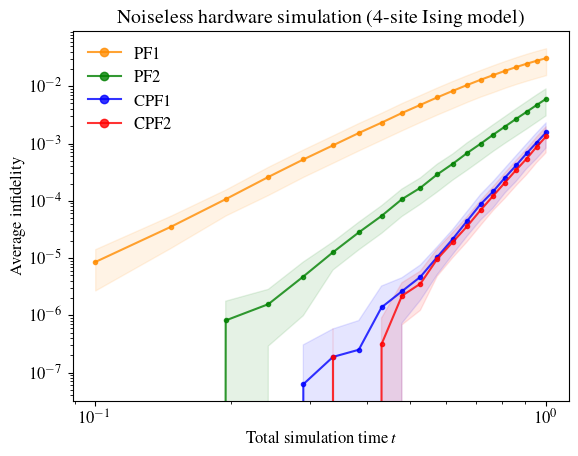

In [26]:
#4-site Ising model
df_noiseless_sim_4site = pd.read_csv('../hardware experiments/ibm_noiseless_simulation_ising_4sites_1step_1e6shots_0.1pparam_20ticks.csv')
tticks = np.linspace(0.1,1,20)
plot_title = 'Noiseless hardware simulation (4-site Ising model)'
plot_path = '../plots/ibm_noiseless_hardware_simulation_4site_Ising.pdf'
cpfs_plot(df_noiseless_sim_4site, tticks, plot_title=plot_title, plot_path = plot_path, logscale=True)